In [1]:
#Cell 1 - Import Libraries & Setup Paths

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

# Append the project root if needed
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

# Define directories for outputs
figures_dir = "../reports/figures"
text_dir = "../reports/text"
processed_dir = "../data/processed"

os.makedirs(figures_dir, exist_ok=True)
os.makedirs(text_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)


In [2]:
#Cell 2 - Load Processed Feature-Engineered Data

data_path = os.path.join(processed_dir, "train_feature_engineered_encoded.csv")
df = pd.read_csv(data_path)
print("Processed data loaded. Shape:", df.shape)

# Save a sample of data for reference
sample_path = os.path.join(text_dir, "final_eval_data_sample.csv")
df.head(10).to_csv(sample_path, index=False)


Processed data loaded. Shape: (1399, 112)


In [3]:
#Cell 3 - Prepare Features and Target, Split Data
# Use only numeric columns to avoid conversion issues.

numeric_df = df.select_dtypes(include=['number'])

if 'SalePrice' not in numeric_df.columns:
    raise ValueError("Target column 'SalePrice' not found.")

y = numeric_df['SalePrice']
X = numeric_df.drop(columns=['SalePrice', 'Id'], errors='ignore')

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (1119, 69)
Validation set shape: (280, 69)


In [4]:
#Cell 4 - Load the Best Ensemble Model
# Import the load_model function from src/models.py

from src.models import load_model

ensemble_model_path = os.path.join(processed_dir, "ensemble_model.pkl")
ensemble_model = load_model(ensemble_model_path)
print("Ensemble model loaded from:", ensemble_model_path)


Ensemble model loaded from: ../data/processed/ensemble_model.pkl


In [5]:
#Cell 5 - Evaluate Model on Validation Set
# Generate predictions on the validation set

y_val_pred = ensemble_model.predict(X_val)

# Import evaluation metrics
from src.evaluation import compute_rmse, compute_r2

rmse = compute_rmse(y_val, y_val_pred)
r2 = compute_r2(y_val, y_val_pred)
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R²: {r2:.2f}")

# Save evaluation metrics to a text file
eval_summary_path = os.path.join(text_dir, "final_evaluation_summary.txt")
with open(eval_summary_path, "w") as f:
    f.write(f"Validation RMSE: {rmse:.2f}\n")
    f.write(f"Validation R²: {r2:.2f}\n")
print("Final evaluation metrics saved to:", eval_summary_path)


Validation RMSE: 19354.04
Validation R²: 0.88
Final evaluation metrics saved to: ../reports/text/final_evaluation_summary.txt


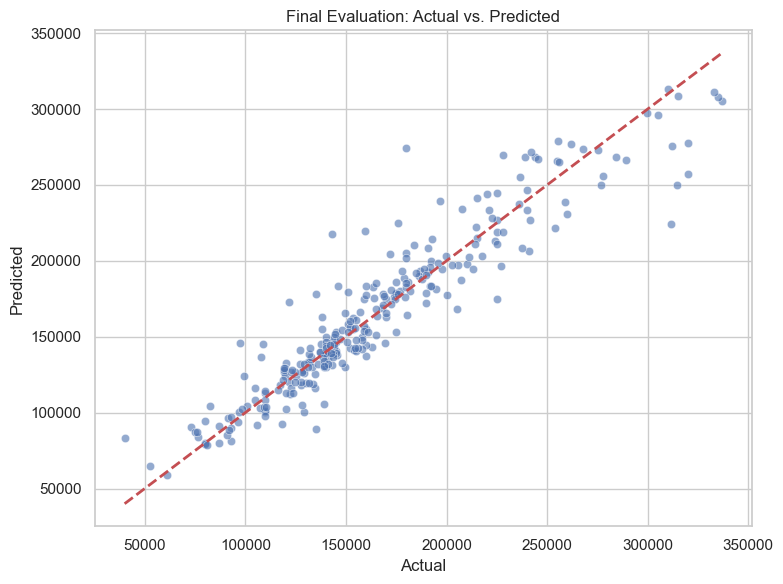

In [6]:
#Cell 6 - Visualize Actual vs. Predicted Values
# Import visualization function from src/evaluation.py
from src.evaluation import plot_actual_vs_predicted

plot_path = os.path.join(figures_dir, "final_actual_vs_predicted.png")
plot_actual_vs_predicted(y_val, y_val_pred, title="Final Evaluation: Actual vs. Predicted", save_path=plot_path)


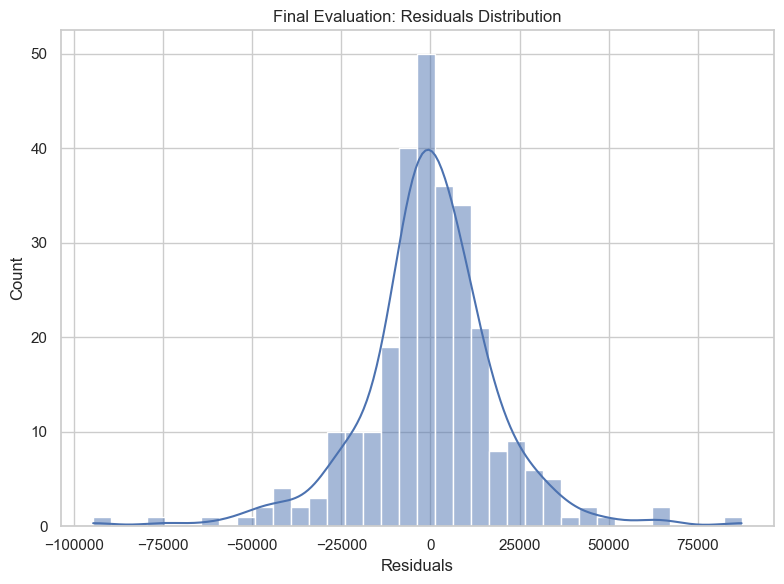

In [7]:
#Cell 7 - Visualize Residual Distribution
# Import the residual plot function

from src.evaluation import plot_residuals

resid_plot_path = os.path.join(figures_dir, "final_residuals_distribution.png")
plot_residuals(y_val, y_val_pred, title="Final Evaluation: Residuals Distribution", save_path=resid_plot_path)


In [8]:
#Cell 8 - Save Detailed Evaluation Report
# Optionally, compile more detailed analysis here

report_path = os.path.join(text_dir, "final_evaluation_report.txt")
with open(report_path, "w") as f:
    f.write("Final Evaluation Report\n")
    f.write("=======================\n")
    f.write(f"Validation RMSE: {rmse:.2f}\n")
    f.write(f"Validation R²: {r2:.2f}\n")
    f.write("Further analysis can be added here (e.g., error breakdown by feature groups).\n")
print("Final evaluation report saved to:", report_path)

Final evaluation report saved to: ../reports/text/final_evaluation_report.txt
